# KNN によるデータの分類評価
KNN モデルを構築し，交差確認法を用いてモデルの評価を行う

In [10]:
import sklearn as sk
import sklearn.model_selection as skms
import sklearn.neighbors as skn
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [6]:
DIRECTORIES = ["../windowed", "../windowed+boxcox", "../reducted", "../reducted+boxcox"]
TIMEWINDOWS = [180, 240]
N_NEIGHBORS_LIST = [1, 3, 5, 7, 9, 11]

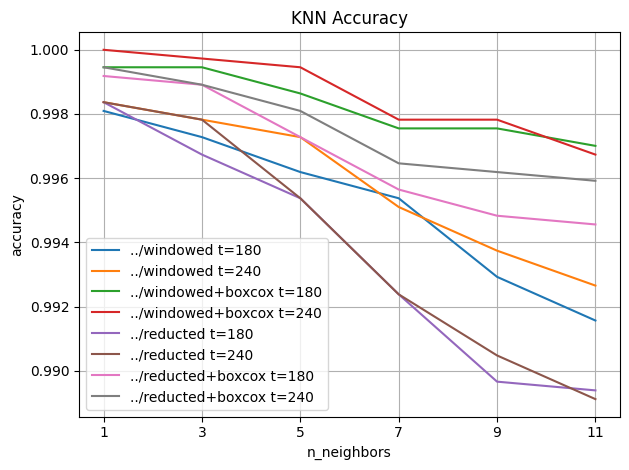

,directory,time_window,n_neighbors,avg,std,avg-std
18,../windowed+boxcox,240,1,1.0,0.0,1.0
19,../windowed+boxcox,240,3,0.999728,0.000544,0.999184
42,../reducted+boxcox,240,1,0.999456,0.000667,0.998789
20,../windowed+boxcox,240,5,0.999456,0.000667,0.998789
12,../windowed+boxcox,180,1,0.999456,0.000667,0.998789
13,../windowed+boxcox,180,3,0.999456,0.000667,0.998789
36,../reducted+boxcox,180,1,0.999184,0.001088,0.998095
43,../reducted+boxcox,240,3,0.998912,0.001018,0.997893
37,../reducted+boxcox,180,3,0.998912,0.001018,0.997893
14,../windowed+boxcox,180,5,0.998639,0.0,0.998639


,directory,time_window,n_neighbors,avg,std,avg-std
18,../windowed+boxcox,240,1,1.0,0.0,1.0
19,../windowed+boxcox,240,3,0.999728,0.000544,0.999184
12,../windowed+boxcox,180,1,0.999456,0.000667,0.998789
42,../reducted+boxcox,240,1,0.999456,0.000667,0.998789
20,../windowed+boxcox,240,5,0.999456,0.000667,0.998789
13,../windowed+boxcox,180,3,0.999456,0.000667,0.998789
14,../windowed+boxcox,180,5,0.998639,0.0,0.998639
36,../reducted+boxcox,180,1,0.999184,0.001088,0.998095
43,../reducted+boxcox,240,3,0.998912,0.001018,0.997893
37,../reducted+boxcox,180,3,0.998912,0.001018,0.997893


In [7]:
N_SPlITS = 5
N_SAMPLES = 75

# スコア表の初期化
df_score = pd.DataFrame(columns=["directory", "time_window", "n_neighbors", "avg", "std", "avg-std"])

for i, directory in enumerate(DIRECTORIES):
    for j, time_window in enumerate(TIMEWINDOWS):
        df = pd.read_csv(f"{directory}/t={time_window}.csv")
        df = df.groupby(["label", "ble_id"]).sample(n=N_SAMPLES, random_state=0)
        X = df.drop(columns=["label", "ble_id"])
        y = df["label"]

        accs = []
        for n_neighbors in N_NEIGHBORS_LIST:
            knn = skn.KNeighborsClassifier(n_neighbors=n_neighbors)
            kf = skms.StratifiedKFold(N_SPlITS, shuffle=True, random_state=0)
            scores = skms.cross_val_score(knn, X, y, cv=kf)
            accs.append(scores.mean())

            df_score.loc[len(df_score)] = pd.Series(
                {
                    "directory": directory,
                    "time_window": time_window,
                    "n_neighbors": n_neighbors,
                    "avg": scores.mean(),
                    "std": scores.std(),
                    "avg-std": scores.mean() - scores.std(),
                },
            )

        plt.plot(N_NEIGHBORS_LIST, accs)

plt.title("KNN Accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(N_NEIGHBORS_LIST)
plt.grid(True)
plt.legend(
    [f"{dir} t={time_window}" for dir in DIRECTORIES for time_window in TIMEWINDOWS]
)

plt.tight_layout()
plt.show()
display(df_score.sort_values("avg", ascending=False).head(20))
display(df_score.sort_values("avg-std", ascending=False).head(20))

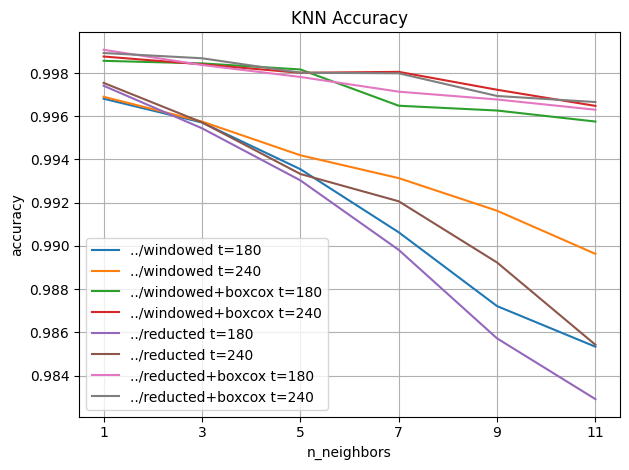

,directory,time_window,n_neighbors,avg,std,avg-std
36,../reducted+boxcox,180,1,0.999076,0.000391,0.998684
42,../reducted+boxcox,240,1,0.998928,0.000439,0.998489
18,../windowed+boxcox,240,1,0.998765,0.000417,0.998348
43,../reducted+boxcox,240,3,0.998684,0.00032,0.998364
12,../windowed+boxcox,180,1,0.998565,0.000399,0.998167
13,../windowed+boxcox,180,3,0.998447,0.000213,0.998234
19,../windowed+boxcox,240,3,0.998403,0.000402,0.998
37,../reducted+boxcox,180,3,0.998373,0.000659,0.997714
14,../windowed+boxcox,180,5,0.998166,0.000403,0.997763
21,../windowed+boxcox,240,7,0.998055,0.000358,0.997697


,directory,time_window,n_neighbors,avg,std,avg-std
36,../reducted+boxcox,180,1,0.999076,0.000391,0.998684
42,../reducted+boxcox,240,1,0.998928,0.000439,0.998489
43,../reducted+boxcox,240,3,0.998684,0.00032,0.998364
18,../windowed+boxcox,240,1,0.998765,0.000417,0.998348
13,../windowed+boxcox,180,3,0.998447,0.000213,0.998234
12,../windowed+boxcox,180,1,0.998565,0.000399,0.998167
19,../windowed+boxcox,240,3,0.998403,0.000402,0.998
14,../windowed+boxcox,180,5,0.998166,0.000403,0.997763
37,../reducted+boxcox,180,3,0.998373,0.000659,0.997714
21,../windowed+boxcox,240,7,0.998055,0.000358,0.997697


In [8]:
# 全データを使用して検証
N_SAMPLES = 60
RANDOM_STATES = [0, 1, 2, 3, 4, 5, 6, 7]

# スコア表の初期化
df_score = pd.DataFrame(columns=["directory", "time_window", "n_neighbors", "avg", "std", "avg-std"])

for i, directory in enumerate(DIRECTORIES):
    for j, time_window in enumerate(TIMEWINDOWS):
        df = pd.read_csv(f"{directory}/t={time_window}.csv")
        
        accs = []
        for n_neighbors in N_NEIGHBORS_LIST:
            scores = []
            for random_state in RANDOM_STATES:
                df_train = df.groupby(["label", "ble_id"]).sample(n=N_SAMPLES, random_state=random_state)
                X_train = df_train.drop(columns=["label", "ble_id"])
                y_train = df_train["label"]
                df_test = df.drop(df_train.index)
                X_test = df_test.drop(columns=["label", "ble_id"])
                y_test = df_test["label"]

                knn = skn.KNeighborsClassifier(n_neighbors=n_neighbors)
                knn.fit(X_train, y_train)

                scores.append(knn.score(X_test, y_test))
                knn()

            accs.append(np.mean(scores))
            df_score.loc[len(df_score)] = pd.Series(
                {
                    "directory": directory,
                    "time_window": time_window,
                    "n_neighbors": n_neighbors,
                    "avg": np.mean(scores),
                    "std": np.std(scores),
                    "avg-std": np.mean(scores) - np.std(scores),
                },
            )

        plt.plot(N_NEIGHBORS_LIST, accs)

        

plt.title("KNN Accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(N_NEIGHBORS_LIST)
plt.grid(True)
plt.legend([f"{dir} t={time_window}" for dir in DIRECTORIES for time_window in TIMEWINDOWS])

plt.tight_layout()
plt.show()
display(df_score.sort_values("avg", ascending=False).head(20))
display(df_score.sort_values("avg-std", ascending=False).head(20))

In [13]:
# モデルの保存
DIRECTORY = "../reducted+boxcox"
TIMEWINDOW = 180
N_SAMPLES = 75
N_NEIGHBORS = 4
OUTPUT_PATH = f"../model/knn_t={TIMEWINDOW}.pkl"

df = pd.read_csv(f"{DIRECTORY}/t={TIMEWINDOW}.csv")
sampled_df = df.groupby(["label", "ble_id"]).sample(n=N_SAMPLES, random_state=0)
X = sampled_df.drop(columns=["label", "ble_id"])
y = sampled_df["label"]

knn = skn.KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
knn.fit(X, y)

score = knn.score(df.drop(columns=["label", "ble_id"]), df["label"])
print(f"score: {score}")

with open(OUTPUT_PATH, "wb") as f:
    pickle.dump(knn, f)

score: 0.9984377362294008
